In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dropout, Dense
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


%run nonlinear_function.py

Regular set: 2
Reduced set: 2
Increased set: 2
Augmented set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400
Augmented data		: 40000			train		: 32000


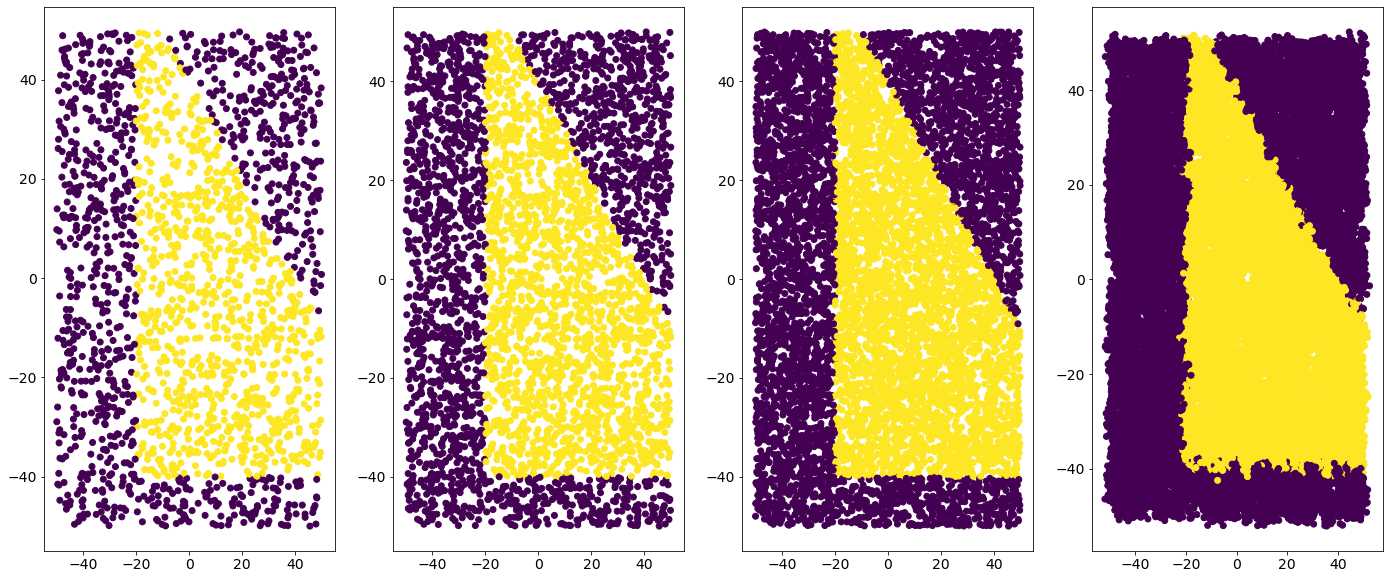

In [64]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)

x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
y_aug = np.zeros( shape = y.shape[0] * 10 )
for i in range( x.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_aug[i*10:i*10+10] = y[i]
N_aug = len(x_aug)

#dim of a sample
L = len(x[0])
print('Regular set:', L_inc)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
N_train_aug = int( perc_train * N_aug )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Split training and test data

In [3]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [4]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [5]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [65]:
(x_train_aug, y_train_aug) = (x_aug[:N_train_aug],y_aug[:N_train_aug])
(x_valid_aug, y_valid_aug) = (x_aug[N_train_aug:],y_aug[N_train_aug:])
print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))

Train: 32000 	 Validation: 8000


### Rescale input data

In [66]:
def Rescale(x):
    #return (x-x.mean()/np.sqrt(x.var()))
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [7]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### optimization method and cost function

In [10]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [11]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [68]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [13]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=2)

Epoch 1/400
32/32 - 1s - loss: 0.6849 - accuracy: 0.5556 - val_loss: 0.6771 - val_accuracy: 0.5325 - 772ms/epoch - 24ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6752 - accuracy: 0.5250 - val_loss: 0.6672 - val_accuracy: 0.5300 - 85ms/epoch - 3ms/step
Epoch 3/400
32/32 - 0s - loss: 0.6666 - accuracy: 0.5431 - val_loss: 0.6564 - val_accuracy: 0.5575 - 82ms/epoch - 3ms/step
Epoch 4/400
32/32 - 0s - loss: 0.6547 - accuracy: 0.5875 - val_loss: 0.6426 - val_accuracy: 0.5775 - 62ms/epoch - 2ms/step
Epoch 5/400
32/32 - 0s - loss: 0.6410 - accuracy: 0.6137 - val_loss: 0.6255 - val_accuracy: 0.6025 - 60ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 0.6205 - accuracy: 0.6344 - val_loss: 0.6066 - val_accuracy: 0.6400 - 70ms/epoch - 2ms/step
Epoch 7/400
32/32 - 0s - loss: 0.6006 - accuracy: 0.6731 - val_loss: 0.5863 - val_accuracy: 0.6775 - 69ms/epoch - 2ms/step
Epoch 8/400
32/32 - 0s - loss: 0.5753 - accuracy: 0.6787 - val_loss: 0.5641 - val_accuracy: 0.7075 - 70ms/epoch - 2ms/step
Epoch 9/400
32

In [14]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6877 - accuracy: 0.6125 - val_loss: 0.6834 - val_accuracy: 0.6200 - 629ms/epoch - 10ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6696 - accuracy: 0.6662 - val_loss: 0.6597 - val_accuracy: 0.6888 - 102ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6379 - accuracy: 0.7084 - val_loss: 0.6204 - val_accuracy: 0.7163 - 108ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5952 - accuracy: 0.7372 - val_loss: 0.5760 - val_accuracy: 0.7437 - 116ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5504 - accuracy: 0.7713 - val_loss: 0.5214 - val_accuracy: 0.7887 - 111ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4838 - accuracy: 0.8269 - val_loss: 0.4494 - val_accuracy: 0.8600 - 113ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4245 - accuracy: 0.8747 - val_loss: 0.4005 - val_accuracy: 0.8888 - 154ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3879 - accuracy: 0.8791 - val_loss: 0.3705 - val_accuracy: 0.8763 - 127ms/epoch - 2ms/step
Epoch 9

In [15]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=2)

Epoch 1/400
128/128 - 1s - loss: 0.6436 - accuracy: 0.6450 - val_loss: 0.5584 - val_accuracy: 0.8087 - 679ms/epoch - 5ms/step
Epoch 2/400
128/128 - 0s - loss: 0.4931 - accuracy: 0.8098 - val_loss: 0.3833 - val_accuracy: 0.8950 - 220ms/epoch - 2ms/step
Epoch 3/400
128/128 - 0s - loss: 0.3667 - accuracy: 0.8739 - val_loss: 0.2815 - val_accuracy: 0.9275 - 206ms/epoch - 2ms/step
Epoch 4/400
128/128 - 0s - loss: 0.3095 - accuracy: 0.8989 - val_loss: 0.2405 - val_accuracy: 0.9356 - 206ms/epoch - 2ms/step
Epoch 5/400
128/128 - 0s - loss: 0.2803 - accuracy: 0.9075 - val_loss: 0.2207 - val_accuracy: 0.9388 - 217ms/epoch - 2ms/step
Epoch 6/400
128/128 - 0s - loss: 0.2663 - accuracy: 0.9130 - val_loss: 0.2087 - val_accuracy: 0.9431 - 254ms/epoch - 2ms/step
Epoch 7/400
128/128 - 0s - loss: 0.2532 - accuracy: 0.9150 - val_loss: 0.2019 - val_accuracy: 0.9431 - 201ms/epoch - 2ms/step
Epoch 8/400
128/128 - 0s - loss: 0.2470 - accuracy: 0.9178 - val_loss: 0.1963 - val_accuracy: 0.9419 - 201ms/epoch - 2

In [69]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=2)

Epoch 1/400
640/640 - 2s - loss: 0.5583 - accuracy: 0.7349 - val_loss: 0.4914 - val_accuracy: 0.7619 - 2s/epoch - 3ms/step
Epoch 2/400
640/640 - 1s - loss: 0.4764 - accuracy: 0.7771 - val_loss: 0.4708 - val_accuracy: 0.7810 - 992ms/epoch - 2ms/step
Epoch 3/400
640/640 - 1s - loss: 0.4567 - accuracy: 0.7927 - val_loss: 0.4476 - val_accuracy: 0.8036 - 1s/epoch - 2ms/step
Epoch 4/400
640/640 - 1s - loss: 0.4231 - accuracy: 0.8135 - val_loss: 0.4110 - val_accuracy: 0.8269 - 993ms/epoch - 2ms/step
Epoch 5/400
640/640 - 1s - loss: 0.3704 - accuracy: 0.8447 - val_loss: 0.3407 - val_accuracy: 0.8727 - 1s/epoch - 2ms/step
Epoch 6/400
640/640 - 1s - loss: 0.3093 - accuracy: 0.8734 - val_loss: 0.2661 - val_accuracy: 0.9035 - 1000ms/epoch - 2ms/step
Epoch 7/400
640/640 - 1s - loss: 0.2440 - accuracy: 0.9039 - val_loss: 0.1970 - val_accuracy: 0.9294 - 1s/epoch - 2ms/step
Epoch 8/400
640/640 - 1s - loss: 0.1639 - accuracy: 0.9370 - val_loss: 0.1255 - val_accuracy: 0.9607 - 1s/epoch - 2ms/step
Epoch 

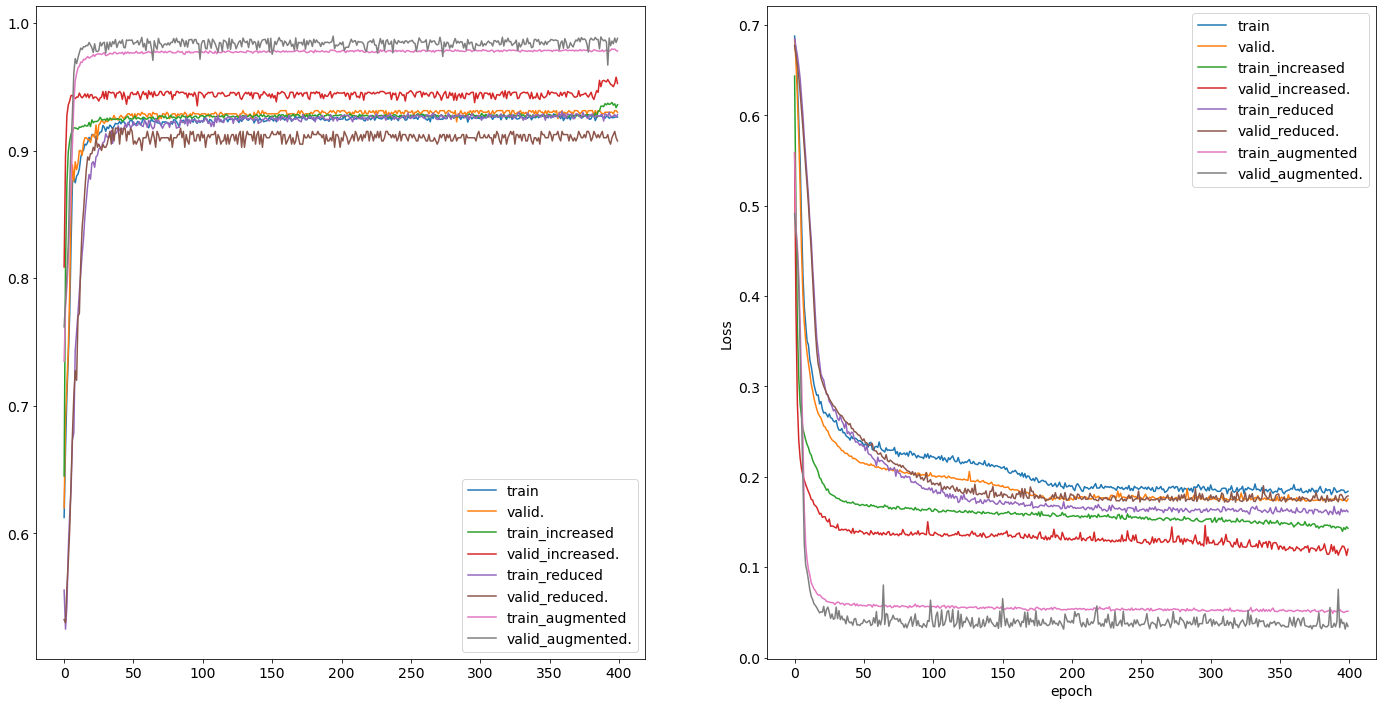

In [71]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.plot(fit_inc.history['accuracy'],label="train_increased")
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.")
ax.plot(fit_red.history['accuracy'],label="train_reduced")
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.")
ax.plot(fit_aug.history['accuracy'],label="train_augmented")
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.")
ax.legend(loc='lower right')

ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.plot(fit_inc.history['loss'],label="train_increased")
ax.plot(fit_inc.history['val_loss'],label="valid_increased.")
ax.plot(fit_red.history['loss'],label="train_reduced")
ax.plot(fit_red.history['val_loss'],label="valid_reduced.")
ax.plot(fit_aug.history['loss'],label="train_augmented")
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [72]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50
#grid_r = (grid-grid.mean()/np.sqrt(grid.var()))

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


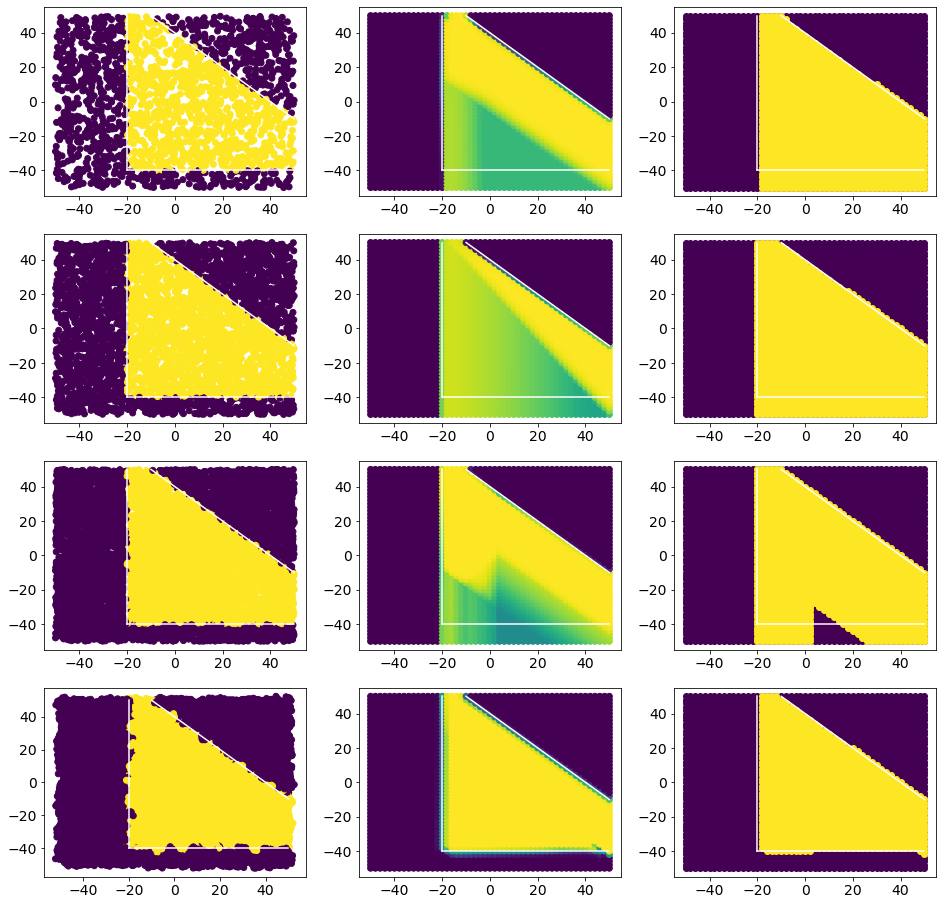

In [74]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32b1d953-5e79-45f4-8767-2987a651ec74' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>